In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('\Group project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [28]:
df_character = pd.read_csv('..\Group project\disney-characters.csv')

df_revenue = pd.read_csv('..\Group project\disney_revenue_1991-2016.csv')

df_movie = pd.read_csv('..\Group project\disney_movies_total_gross.csv')

df_voice = pd.read_csv('..\Group project\disney-voice-actors.csv')

df_directors = pd.read_csv('..\Group project\disney-directors.csv')

# Exploring the Character Dataset

In [4]:
df_character.head()

,movie_title,release_date,hero,villian,song
0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


### Get rid of the \n character

In [5]:
df_character['movie_title'] = df_character['movie_title'].str.replace('\n','')

In [6]:
df_character.head(10)

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song
5,Saludos Amigos,"February 6, 1943",Donald Duck,NaN,Saludos Amigos\n
6,The Three Caballeros,"February 3, 1945",Donald Duck,NaN,NaN
7,Make Mine Music,"April 20, 1946",NaN,NaN,NaN
8,Fun and Fancy Free,"September 27, 1947",Mickey Mouse,Willie the Giant,NaN
9,Melody Time,"May 27, 1948",NaN,NaN,Little Toot


### Get rid of NaN(Null) values

In [7]:
df_character.isnull().sum()

movie_title      0
release_date     0
hero             4
villian         10
song             9
dtype: int64

In [8]:
df_character.fillna('NULL', inplace = True)

In [9]:
df_character[['movie_title','release_date','hero','villian','song']]

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,"November 13, 1940",NULL,Chernabog,NULL
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song
5,Saludos Amigos,"February 6, 1943",Donald Duck,NULL,Saludos Amigos\n
6,The Three Caballeros,"February 3, 1945",Donald Duck,NULL,NULL
7,Make Mine Music,"April 20, 1946",NULL,NULL,NULL
8,Fun and Fancy Free,"September 27, 1947",Mickey Mouse,Willie the Giant,NULL
9,Melody Time,"May 27, 1948",NULL,NULL,Little Toot


In [10]:
df_character.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_title   56 non-null     object
 1   release_date  56 non-null     object
 2   hero          56 non-null     object
 3   villian       56 non-null     object
 4   song          56 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [11]:
df_character.duplicated(subset=['release_date'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
dtype: bool

# Exploring the Revenue Dataset

In [12]:
df_revenue.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359.0,10414
4,1995,6001.5,2150.0,NaN,3959.8,414.0,12525


### Simplifying the columns

In [13]:
df1 =df_revenue.rename(columns={'Studio Entertainment[NI 1]':'StudioEntertainment','Disney Consumer Products[NI 2]':'DisneyConsumerProducts','Disney Interactive[NI 3][Rev 1]':'DisneyInteractive','Walt Disney Parks and Resorts':'WaltDisneyParks','Disney Media Networks':'DisneyMediaNetworks'})

In [14]:
df1.describe()

,Year,StudioEntertainment,DisneyConsumerProducts,DisneyInteractive,WaltDisneyParks,DisneyMediaNetworks,Total
count,26.000000,25.000000,24.000000,12.000000,26.000000,23.000000,26.000000
mean,2003.500000,6445.036000,2591.054167,713.666667,8512.619231,12877.695652,29459.692308
std,7.648529,1570.276711,877.112322,386.480938,4253.949784,6736.879986,13846.671536
min,1991.000000,2593.000000,724.000000,174.000000,2794.000000,359.000000,6111.000000
25%,1997.250000,5994.000000,2182.250000,341.000000,5143.500000,8540.500000,22598.750000
50%,2003.500000,6701.000000,2475.500000,740.000000,7276.500000,13207.000000,28906.500000
75%,2009.750000,7364.000000,3085.000000,1002.500000,11318.250000,17938.000000,38008.000000
max,2016.000000,9441.000000,4499.000000,1299.000000,16974.000000,23689.000000,55632.000000


In [15]:
df1.isnull().sum()

Year                       0
StudioEntertainment        1
DisneyConsumerProducts     2
DisneyInteractive         14
WaltDisneyParks            0
DisneyMediaNetworks        3
Total                      0
dtype: int64

In [16]:
df1.info

<bound method DataFrame.info of     Year  StudioEntertainment  DisneyConsumerProducts  DisneyInteractive  \
0   1991               2593.0                   724.0                NaN   
1   1992               3115.0                  1081.0                NaN   
2   1993               3673.4                  1415.1                NaN   
3   1994               4793.0                  1798.2                NaN   
4   1995               6001.5                  2150.0                NaN   
5   1996                  NaN                     NaN                NaN   
6   1997               6981.0                  3782.0              174.0   
7   1998               6849.0                  3193.0              260.0   
8   1999               6548.0                  3030.0              206.0   
9   2000               5994.0                  2602.0              368.0   
10  2001               7004.0                  2590.0                NaN   
11  2002               6465.0                  2440.0   

### To get Visualizations to work right, we need to make the NaN datapoints as float values and represented with a zero

In [17]:
df1.replace(np.nan,0)

,Year,StudioEntertainment,DisneyConsumerProducts,DisneyInteractive,WaltDisneyParks,DisneyMediaNetworks,Total
0,1991,2593.0,724.0,0.0,2794.0,0.0,6111
1,1992,3115.0,1081.0,0.0,3306.0,0.0,7502
2,1993,3673.4,1415.1,0.0,3440.7,0.0,8529
3,1994,4793.0,1798.2,0.0,3463.6,359.0,10414
4,1995,6001.5,2150.0,0.0,3959.8,414.0,12525
5,1996,0.0,0.0,0.0,4502.0,4142.0,18739
6,1997,6981.0,3782.0,174.0,5014.0,6522.0,22473
7,1998,6849.0,3193.0,260.0,5532.0,7142.0,22976
8,1999,6548.0,3030.0,206.0,6106.0,7512.0,23402
9,2000,5994.0,2602.0,368.0,6803.0,9615.0,25402


[Text(0.5, 1.0, 'Studio Entertainment Revenue')]

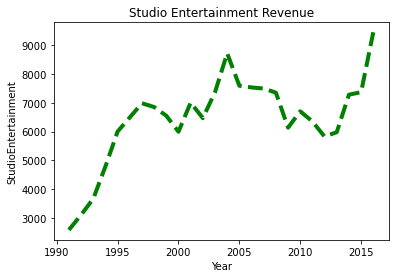

In [18]:
sns.lineplot(x='Year',y='StudioEntertainment',linewidth = 4,color = 'green',linestyle='dashed',data = df1).set(title='Studio Entertainment Revenue')

[Text(0.5, 1.0, 'Disney Consumer Products Revenue')]

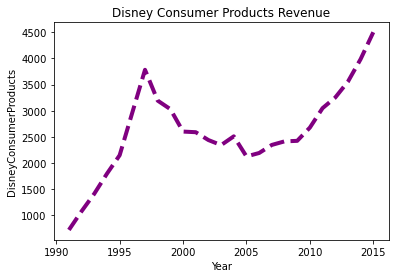

In [19]:
#df1[['DisneyConsumerProducts','Year']]

sns.lineplot(x='Year',y='DisneyConsumerProducts',linewidth = 4,color = 'purple',linestyle='dashed',data = df1).set(title='Disney Consumer Products Revenue')

[Text(0.5, 1.0, 'Disney Interactive Revenue')]

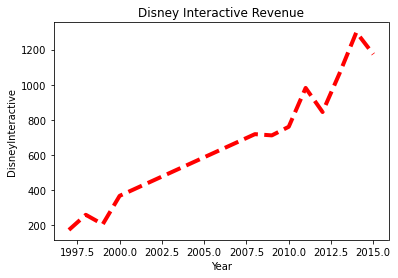

In [20]:
sns.lineplot(x='Year',y='DisneyInteractive',linewidth = 4,color = 'red',linestyle='dashed',data = df1).set(title='Disney Interactive Revenue')

[Text(0.5, 1.0, 'Walt Disney Parks Revenue')]

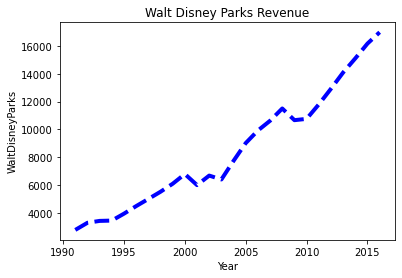

In [21]:
sns.lineplot(x='Year',y='WaltDisneyParks',linewidth = 4,color = 'blue',linestyle='dashed',data = df1).set(title='Walt Disney Parks Revenue')

In [22]:
df1['DisneyMediaNetworks'] = df1['DisneyMediaNetworks'].fillna(0)

In [23]:
df1[['DisneyMediaNetworks','Year']]

,DisneyMediaNetworks,Year
0,0.0,1991
1,0.0,1992
2,0.0,1993
3,359.0,1994
4,414.0,1995
5,4142.0,1996
6,6522.0,1997
7,7142.0,1998
8,7512.0,1999
9,9615.0,2000


[Text(0.5, 1.0, 'DisneyMediaNetworks')]

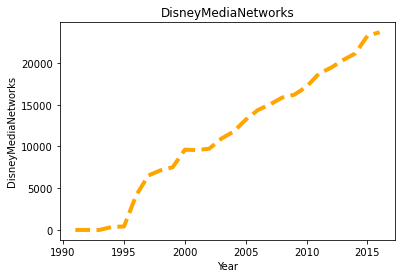

In [25]:
sns.lineplot(x='Year',y='DisneyMediaNetworks',linewidth = 4,color = 'orange',linestyle='dashed',data = df1).set(title='DisneyMediaNetworks')

# Exploring the Disney Movie Total Gross dataset

In [30]:
df_movie.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [29]:
df_movie.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
MPAA_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [31]:
df_movie.fillna('NULL', inplace = True)

In [32]:
sum(df_movie.duplicated())

0

In [33]:
import datetime
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])
df_movie['release_date'].head()

0   1937-12-21
1   1940-02-09
2   1940-11-13
3   1946-11-12
4   1950-02-15
Name: release_date, dtype: datetime64[ns]

In [34]:
df_movie.drop(['MPAA_rating','inflation_adjusted_gross',],axis=1,inplace = True)
print('After Removing Unused Columns(Rows,Columns) :',df_movie.shape)

After Removing Unused Columns(Rows,Columns) : (579, 4)


In [35]:
# Checking for zero values
print('Rows with Zero Values in the Total Gross Column',df_movie[(df_movie['total_gross']==0)].shape[0])

Rows with Zero Values in the Total Gross Column 0


### Movie count per year

release_date
2016-09-02    1
2016-09-23    1
2016-11-04    1
2016-11-23    1
2016-12-16    1
Name: movie_title, dtype: int64


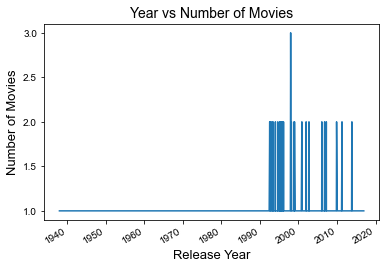

In [36]:
# make group for each year and count the number of movies in each year
data = df_movie.groupby('release_date').count()['movie_title']
print(data.tail())
#Make a group of the data according to their release year and count total number 
df_movie.groupby('release_date').count()['movie_title'].plot()

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title('Year vs Number of Movies',fontsize = 14)
plt.xlabel('Release Year', fontsize = 13)
plt.ylabel('Number of Movies', fontsize = 13)
sns.set_style('whitegrid')

In [37]:
df_movie['total_gross'] = df_movie['total_gross'].str.replace(',','')
df_movie['total_gross'] = df_movie['total_gross'].str.replace('$','')
df_movie['total_gross'] = df_movie['total_gross'].astype(int)

C:\Users\tanzi\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Highest Grossing and Lowest Grossing Movie

In [38]:
def find_minmax(x):
    min_index = df_movie[x].idxmin()
    high_index = df_movie[x].idxmax()
    high = pd.DataFrame(df_movie.loc[high_index,:])
    low = pd.DataFrame(df_movie.loc[min_index,:])
    
    print('Movie Which has the Highest '+ x +':',df_movie['movie_title'][high_index])
    print('Movie Which has the Lowest '+ x +':',df_movie['movie_title'][min_index])
    return pd.concat([high,low],axis =1)

find_minmax('total_gross')

Movie Which has the Highest total_gross: Star Wars Ep. VII: The Force Awakens
Movie Which has the Lowest total_gross: The Many Adventures of Winnie the Pooh


,564,20
movie_title,Star Wars Ep. VII: The Force Awakens,The Many Adventures of Winnie the Pooh
release_date,2015-12-18 00:00:00,1977-03-11 00:00:00
genre,Adventure,NULL
total_gross,936662225,0


### Top 10 Grossing Movies

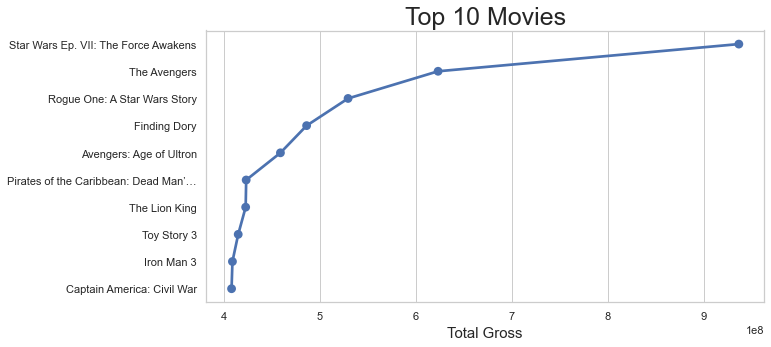

In [39]:
info = pd.DataFrame(df_movie['total_gross'].sort_values(ascending= False))
info['movie_title'] = df_movie['movie_title']
data = list(map(str,(info['movie_title'])))
x = list(data[:10])
y = list(info['total_gross'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(10,5)})
ax.set_title('Top 10 Movies',fontsize = 25)
ax.set_xlabel('Total Gross',fontsize= 15)
sns.set_style('darkgrid')

## Statistics by months

In [45]:
# extract the month number from the release date
month_release = df_movie['release_date'].dt.month

#Count the movies in each month using value_counts
number_of_releases = month_release.value_counts().sort_index()
months =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_releases = pd.DataFrame(number_of_releases)
number_of_releases['month'] = months

#change the column name of the new dataframe
number_of_releases.rename(columns = {'release_date':'number_of_releases'},inplace = True)

### Movie releases by months (1937-2016)

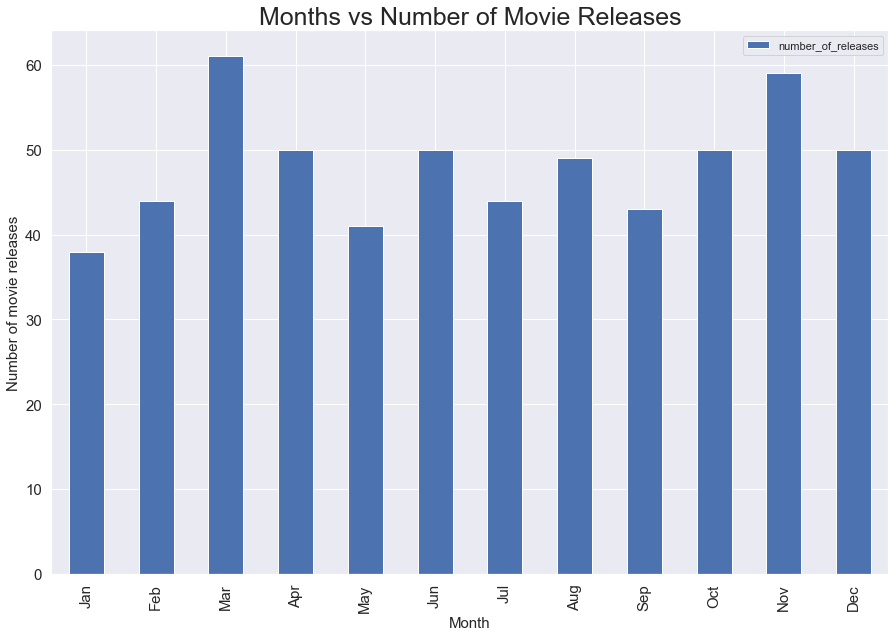

In [48]:
# plot the bar graph
number_of_releases.plot(x='month', kind='bar',fontsize = 15, figsize=(15,10))

#set the labels and titles 
plt.title('Months vs Number of Movie Releases', fontsize = 25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of movie releases', fontsize =15)
sns.set_style('darkgrid')

### Average gross by month (1937-2016)

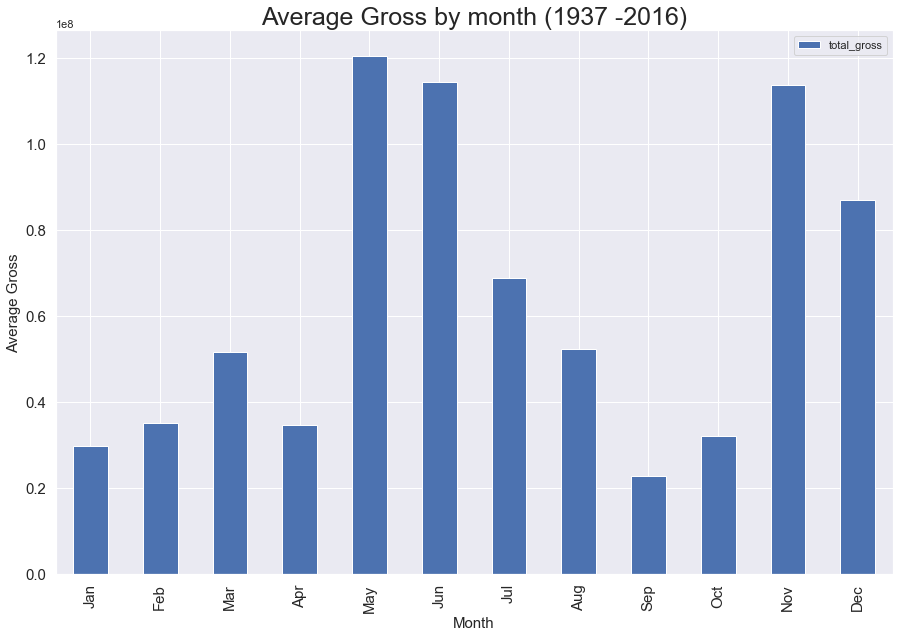

In [49]:
month_release = pd.DataFrame(month_release)
month_release.rename(columns= {'release_date':'release_month'},inplace = True)

month_release['total_gross'] = df_movie['total_gross']
 

mean_revenue = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

mean_revenue.plot(x = 'month', kind='bar', figsize = (15,10),fontsize = 15)

plt.title('Average Gross by month (1937 -2016)',fontsize = 25)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Average Gross', fontsize = 15)
sns.set_style('darkgrid')

### Genre Statistics

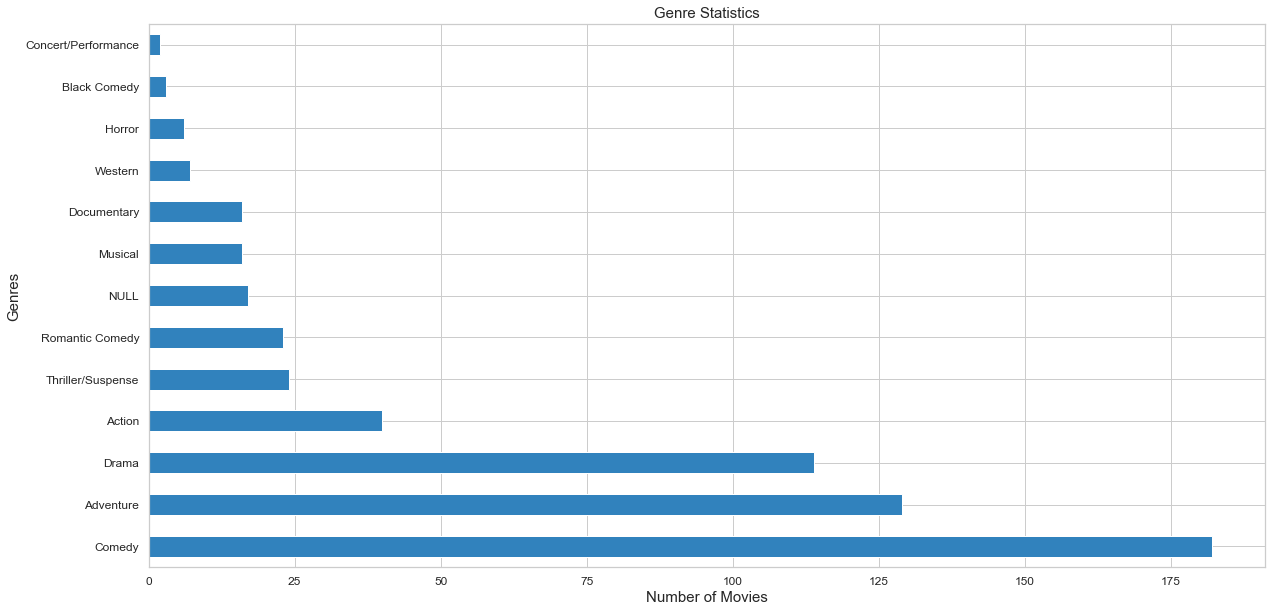

In [51]:
# make a function will split the string and return the count of each genre
def count_genre(x):
    # concatenate all the rows of the genre
    data_plot = df_movie[x].str.cat(sep= '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending= False)
    return info

total_genre_movies = count_genre('genre')
total_genre_movies.plot(kind='barh',figsize=(20,10),fontsize=12, colormap = 'tab20c')

plt.title('Genre Statistics', fontsize = 15)
plt.xlabel('Number of Movies', fontsize = 15)
plt.ylabel('Genres', fontsize = 15)
sns.set_style('whitegrid')

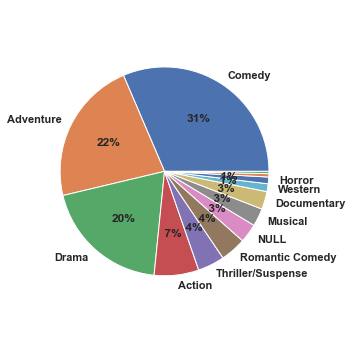

In [52]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre,total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight = 'bold')
f, ax = plt.subplots(figsize = (5,5))
genre_count.sort(key = lambda x:x[1], reverse= True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n,v in genre_count]
ax.pie(sizes, labels = labels_selected,autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
      shadow = False, startangle= 0)
ax.axis('equal')
plt.tight_layout()

# Exploring Voice actors

In [96]:
df_voice.head()

,character,voice-actor,movie
0,Abby Mallard,Joan Cusack,Chicken Little
1,Abigail Gabble,Monica Evans,The Aristocats
2,Abis Mal,Jason Alexander,The Return of Jafar
3,Abu,Frank Welker,Aladdin
5,Adella,Sherry Lynn,The Little Mermaid


In [97]:
df_voice.isnull().sum()

character      0
voice-actor    0
movie          0
dtype: int64

In [103]:
df_voice['voice-actor'].value_counts()

Frank Welker                         24
Jim Cummings                         17
Corey Burton                          8
J. Pat O'Malley                       8
Jeff Bennett                          8
                                     ..
Zachary Levi                          1
Leo De Lyon                           1
Stan Alexander; Sterling Holloway     1
Jason Marin                           1
Suzanne Pleshette                     1
Name: voice-actor, Length: 655, dtype: int64

In [104]:
#Getting rid of None values
df_voice = df_voice.replace(to_replace='None', value=np.nan).dropna()

In [105]:
#Since the same voice actor can perform in multiple movies, we have 227 duplicates
sum(df_voice['voice-actor'].duplicated())

227

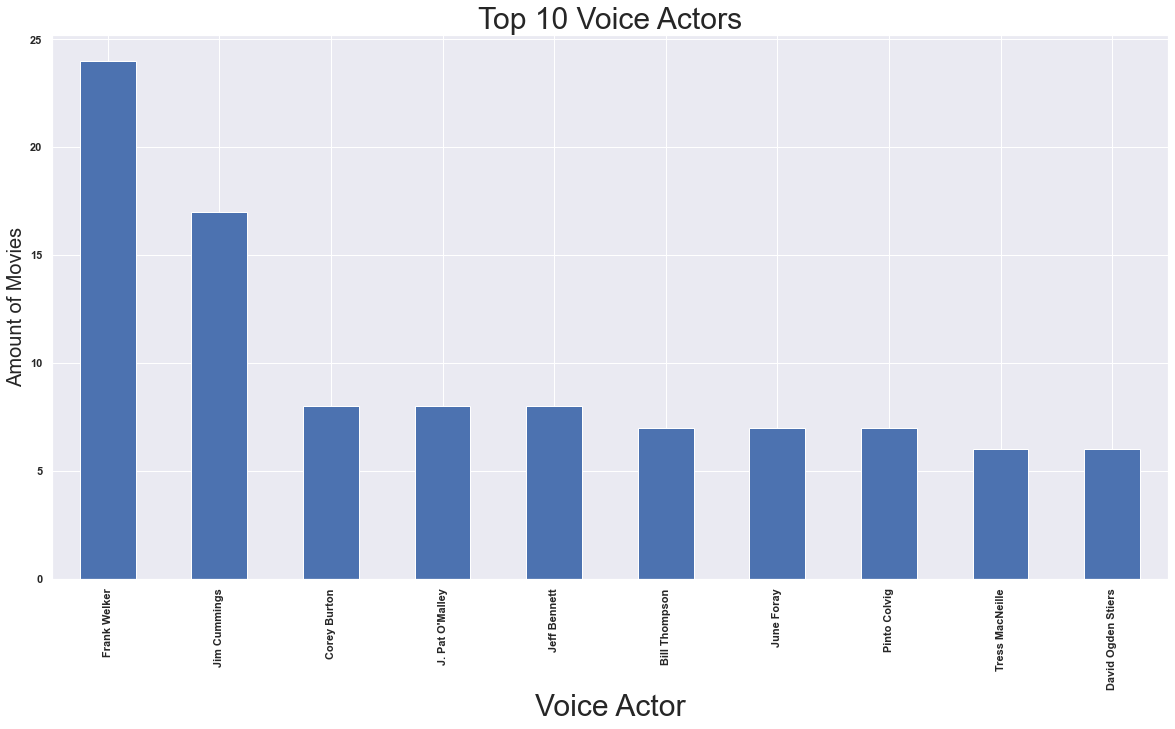

In [106]:
df_voice['voice-actor'].value_counts()[0:10].plot(kind='bar',figsize=(20,10))
plt.xlabel('Voice Actor',fontsize = 30)
plt.ylabel('Amount of Movies',fontsize = 20)
plt.title('Top 10 Voice Actors',fontsize = 30)
sns.set_style('darkgrid')

# Exploring Directors

In [107]:
df_directors.head()

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


In [108]:
df_directors.isnull().sum()

name        0
director    0
dtype: int64

In [109]:
df_directors['director'].value_counts()

Ron Clements           7
Wolfgang Reitherman    7
Jack Kinney            4
Gary Trousdale         3
Clyde Geronimi         3
Stephen J. Anderson    2
Mark Dindal            2
Chris Buck             2
Ben Sharpsteen         2
Mike Gabriel           2
David Hand             2
Hamilton Luske         2
full credits           2
Ted Berman             1
Robert Walker          1
Don Hall               1
Rich Moore             1
Nathan Greno           1
Chris Williams         1
Will Finn              1
Chris Sanders          1
George Scribner        1
Norman Ferguson        1
Ralph Zondag           1
Wilfred Jackson        1
Barry Cook             1
Roger Allers           1
Art Stevens            1
Byron Howard           1
Name: director, dtype: int64

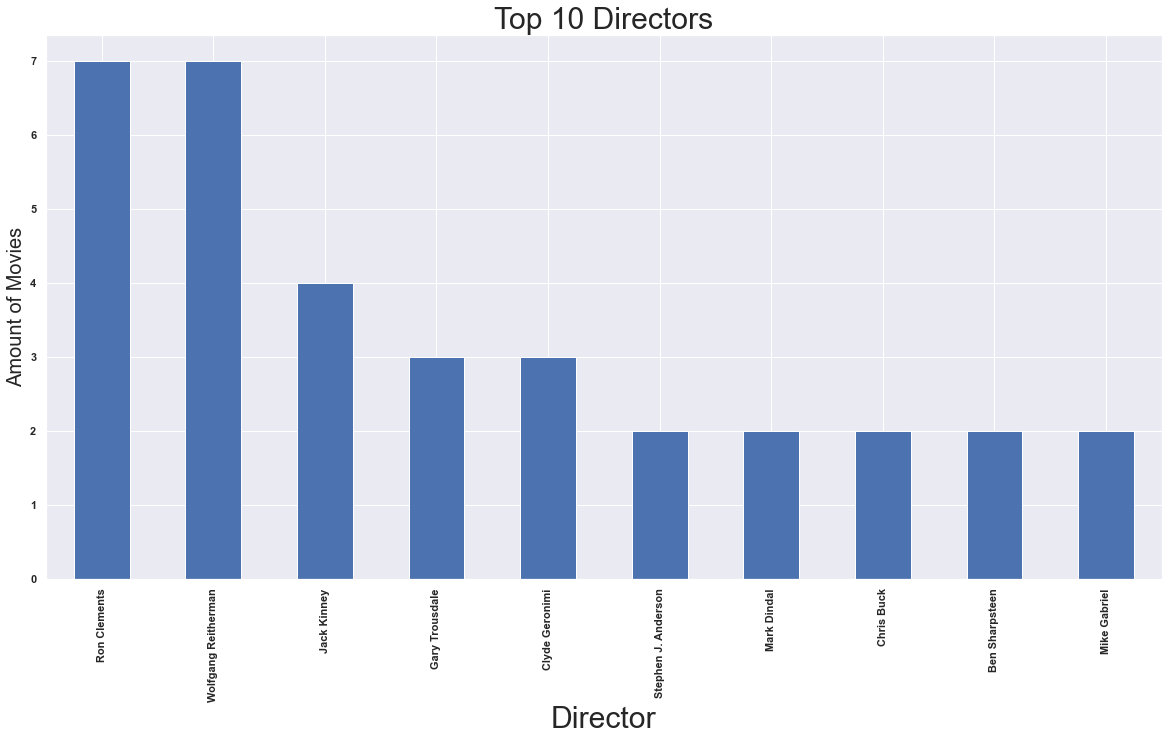

In [115]:
df_directors['director'].value_counts()[0:10].plot(kind='bar',figsize=(20,10))
plt.xlabel('Director',fontsize = 30)
plt.ylabel('Amount of Movies',fontsize = 20)
plt.title('Top 10 Directors',fontsize = 30)
sns.set_style('darkgrid')